## Imports and Setup

In [2]:
import os 
os.chdir('../')
import yaml
import geopandas as gpd
from utils import data_annotator

%load_ext autoreload
%autoreload 2

## Parameters

In [493]:
iso_code = "GRD"
path_to_images = f"data/aerial/raster/{iso_code}/tiles_{iso_code}/"
path_to_file = f"data/aerial/vector/{iso_code}/tiles_{iso_code}/tiles_0-29_{iso_code}.geojson"

config_file = "configs/config_aerial.yaml"
with open(config_file, 'r') as stream:
    labels = yaml.safe_load(stream)

## Interactive Annotation

In [494]:
da = data_annotator.DataAnnotator(path_to_images, path_to_file, labels, index=0)
da.widget

MulticlassLabeller(children=(HTML(value='<h2 style="text-align:center;">48015_679.tif <br> Index: 0</h2><h3 st…

In [490]:
da.end_timer()

INFO:root:Elapsed time: 0:05:49.945431
INFO:root:Annotation rate: 18.42 seconds per annotation
INFO:root:Total annotations for this session: 19


## Visualize Annotations

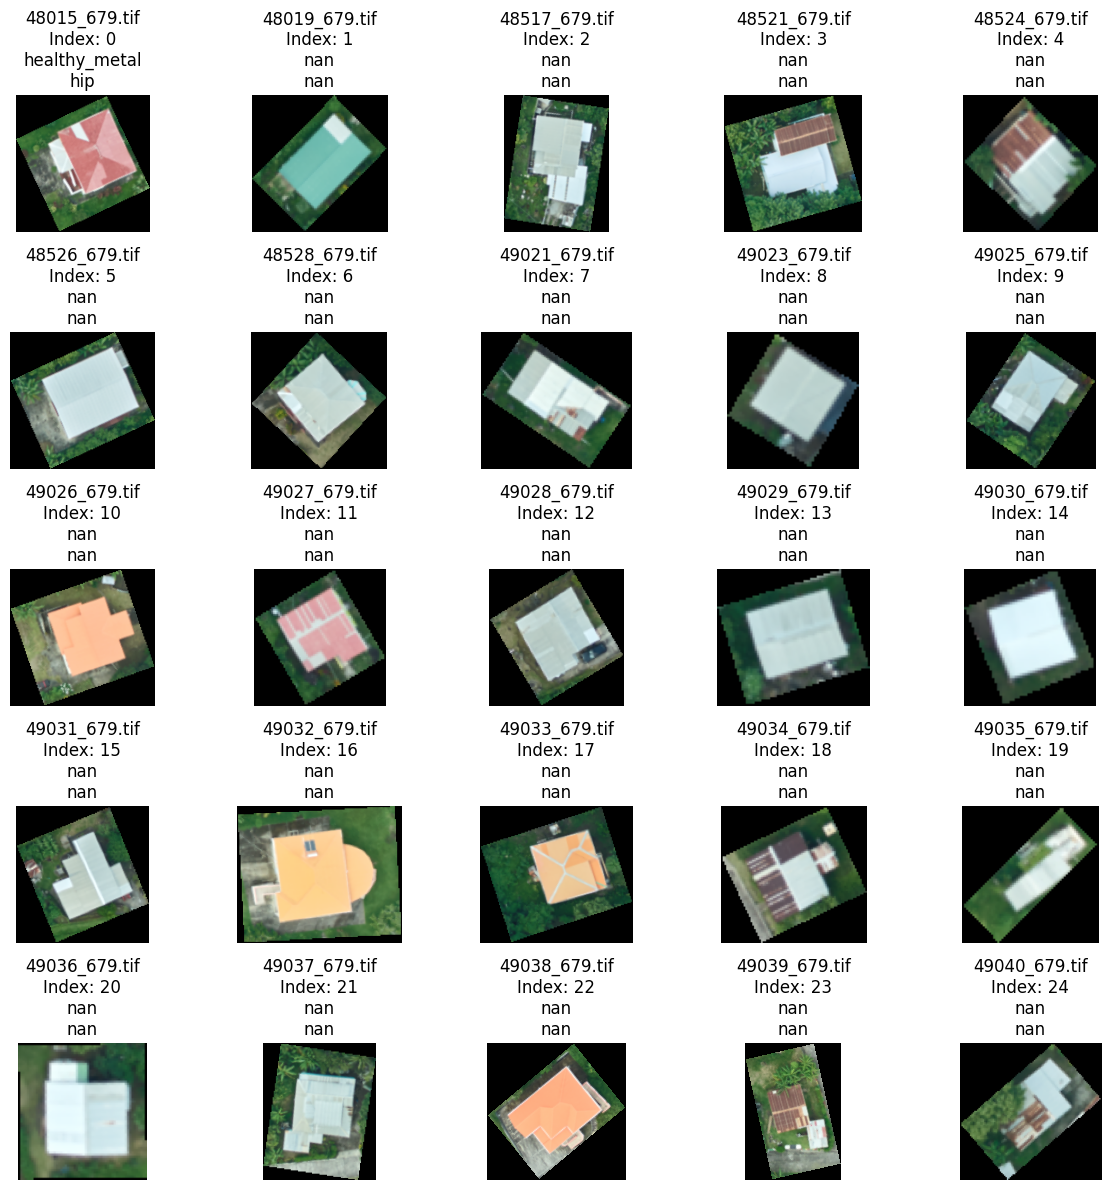

In [497]:
da.visualize_annotations(index=0)

# To show only hipped buildings, uncomment the following:
#da.visualize_annotations(index=0, query="roof_material == 'healthy_metal'")

## Show raw data

In [498]:
data = da.load_data()
print(f"Total annotated (not including skipped): {data[data.annotated == True].shape[0]}")
for label in labels:
    print(data[label].value_counts())
data.head(3)

Total annotated (not including skipped): 1
roof_material
nan              1069
healthy_metal       1
Name: count, dtype: int64
roof_pitch
nan    1069
hip       1
Name: count, dtype: int64


,UID,ghsl_smod,rurban,grid_id,filename,annotated,roof_material,roof_pitch,geometry,filepath
0,48015,21,urban,679,48015_679.tif,True,healthy_metal,hip,"POLYGON ((-61.64613 12.22339, -61.64608 12.223...",C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...
1,48019,21,urban,679,48019_679.tif,False,nan,nan,"POLYGON ((-61.6485 12.22324, -61.64846 12.2232...",C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...
2,48517,21,urban,679,48517_679.tif,False,nan,nan,"POLYGON ((-61.64809 12.22304, -61.64812 12.223...",C:\Users\Isabelle\Documents\GFDRR\dep\caribbea...
